<a href="https://colab.research.google.com/github/rukaiyafahmida/SoftComputing/blob/main/Assignment_1_170204004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torchmetrics
import os
import numpy as np
import pandas as pd
import torch
import torchvision
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
import torchmetrics
import math

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/4.2 Rukaiya/assignment2Data/firmware/firmware.csv')
df0

,filename,class,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,Unnamed: 1027
0,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,...,0,0,0,0,0,0,0,0,0,NaN
1,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,...,0,51,0,0,0,34,0,0,0,NaN
2,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,...,0,0,0,0,0,0,0,0,0,NaN
3,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,...,0,51,0,0,0,34,0,0,0,NaN
4,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38882,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,...,0,0,0,0,0,0,0,0,0,NaN
38883,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,...,0,0,0,0,0,0,0,0,0,NaN
38884,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,...,0,0,0,0,0,0,0,0,0,NaN
38885,x86__64__lsb__unix-system-v__clang-3.9.0__O0__...,benignware,0,85,17,34,34,0,17,17,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
len(df0)

38887

In [ ]:
 df0.iloc[[334]]  # DataFrame result

,filename,class,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,Unnamed: 1027
334,x86__64__lsb__unix-system-v__gcc-4.9.4__Os__no...,malware,1,85,17,34,34,0,17,17,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
X = []
y = []

In [ ]:
X = df0.iloc[:, 0].values
y = df0.iloc[:, 1].values

In [ ]:
df1 = pd.DataFrame(
    {'file_name': X,
     'class_name': y })

In [ ]:
df1.head(3)

,file_name,class_name
0,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware
1,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware
2,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware


In [ ]:
data_dir = '/content/drive/MyDrive/4.2 Rukaiya/assignment2Data/imagery'

In [ ]:
transform = transforms.Compose([
                  transforms.Grayscale(num_output_channels=1),
                  transforms.Resize((32, 32)), 
                  transforms.Normalize(.5, .5),
                  transforms.ToTensor(),])

In [ ]:
dataset = ImageFolder(data_dir, transform=transform)
print(dataset)

Dataset ImageFolder
    Number of datapoints: 4482
    Root location: /content/drive/MyDrive/4.2 Rukaiya/assignment2Data/imagery
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=0.5, std=0.5)
               ToTensor()
           )


In [ ]:
random_seed = 4
torch.manual_seed(random_seed);
test_size = math.floor(0.2 * len(dataset))
val_size = math.floor(0.15 * len(dataset))
train_size = len(dataset) - val_size - test_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
len(train_dataset), len(val_dataset), len(test_dataset)

(2914, 672, 896)

In [ ]:
#Hyper parameters
input_size = 32*32
hidden_size = 100
num_classes = 4
batch_size = 20
num_epochs = 200
lr = 0.001

In [ ]:
def accuracy(outputs, labels):
  metric = torchmetrics.Accuracy()
  metric = metric.cuda()
  return metric(outputs, labels)

def precision(outputs, labels):
  metric = torchmetrics.Precision(average='macro', num_classes=4)
  metric = metric.cuda()
  return metric(outputs, labels)

def recall(outputs, labels):
  metric = torchmetrics.Recall(average='macro', num_classes=4)
  metric = metric.cuda()
  return metric(outputs, labels)

def f1_score(outputs, labels):
  pr = precision(outputs, labels)
  re = recall(outputs, labels)
  return 2 * pr * re / (pr + re)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class NNet(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.layer_1 = nn.Linear(in_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, hidden_size)
        self.layer_4 = nn.Linear(hidden_size, hidden_size)
        self.layer_5 = nn.Linear(hidden_size, hidden_size)
        self.layer_6 = nn.Linear(hidden_size, out_size)
        
    def forward(self, x):
        # Flatten the image tensors
        x = x.view(x.size(0), -1)
        
        out = self.layer_1(x)
        out = F.relu(out)
        out = self.layer_2(out)
        out = F.relu(out)
        out = self.layer_3(out)
        out = F.relu(out)
        out = self.layer_4(out)
        out = F.relu(out)
        out = self.layer_5(out)
        out = F.relu(out)
        out = self.layer_6(out)
        return out
    

    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  
        loss = F.cross_entropy(out, labels) 
        return loss
    

    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                   
        loss = F.cross_entropy(out, labels)  
        acc = accuracy(out, labels)           
        prec = precision(out, labels)
        rec = recall(out, labels)
        f1 = f1_score(out, labels)
        return {'val_loss':loss, 'val_acc': acc, 'val_recall': rec, 'val_precision': prec, 'val_f1': f1}
        

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  
        batch_recall = [x['val_recall'] for x in outputs]
        epoch_recall = torch.stack(batch_recall).mean()  
        batch_precision = [x['val_precision'] for x in outputs]
        epoch_precision = torch.stack(batch_precision).mean()  
        batch_f1 = [x['val_f1'] for x in outputs]
        epoch_f1 = torch.stack(batch_f1).mean()     
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item(), 'val_recall': epoch_recall.item(), 'val_precision': epoch_precision.item(), 'val_f1': epoch_f1.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {}, val_acc: {}, val_recall: {}, val_precision: {}, val_f1: {}".format(epoch, result['val_loss'], result['val_acc'], result['val_recall'], result['val_precision'], result['val_f1']))

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
validation_dataloader = DataLoader(val_dataset, batch_size)
test_dataloader = DataLoader(test_dataset, batch_size)
model = NNet(input_size, hidden_size, out_size=num_classes)


# Moving the model and datasets
to_device(model, device)
train_dataloader = DeviceDataLoader(train_dataloader, device)
validation_dataloader = DeviceDataLoader(validation_dataloader, device)
test_dataloader = DeviceDataLoader(test_dataloader, device)

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = NNet(input_size, hidden_size, out_size=num_classes)
model.to(device)

NNet(
  (layer_1): Linear(in_features=1024, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=100, bias=True)
  (layer_4): Linear(in_features=100, out_features=100, bias=True)
  (layer_5): Linear(in_features=100, out_features=100, bias=True)
  (layer_6): Linear(in_features=100, out_features=4, bias=True)
)

In [ ]:
history = fit(num_epochs, model, train_dataloader, lr, validation_dataloader)

Epoch [0], val_loss: 1.3674, val_acc: 0.1426, val_recall: 0.2549, val_precision: 0.0411, val_f1: nan
Epoch [1], val_loss: 1.3230, val_acc: 0.6627, val_recall: 0.3137, val_precision: 0.2127, val_f1: 0.2517
Epoch [2], val_loss: 1.2835, val_acc: 0.6627, val_recall: 0.3137, val_precision: 0.2127, val_f1: 0.2517
Epoch [3], val_loss: 1.2472, val_acc: 0.6627, val_recall: 0.3137, val_precision: 0.2127, val_f1: 0.2517
Epoch [4], val_loss: 1.2141, val_acc: 0.6627, val_recall: 0.3137, val_precision: 0.2127, val_f1: 0.2517
Epoch [5], val_loss: 1.1838, val_acc: 0.6627, val_recall: 0.3137, val_precision: 0.2127, val_f1: 0.2517
Epoch [6], val_loss: 1.1564, val_acc: 0.6627, val_recall: 0.3137, val_precision: 0.2127, val_f1: 0.2517
Epoch [7], val_loss: 1.1315, val_acc: 0.6627, val_recall: 0.3137, val_precision: 0.2127, val_f1: 0.2517
Epoch [8], val_loss: 1.1092, val_acc: 0.6627, val_recall: 0.3137, val_precision: 0.2127, val_f1: 0.2517
Epoch [9], val_loss: 1.0891, val_acc: 0.6627, val_recall: 0.3137, v

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracies(history, metric, ylabel, title):
    accuracies = [x[metric] for x in history]
    plt.plot(accuracies)
    plt.xlabel('epoch')
    plt.ylabel(ylabel)
    plt.title(title);

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-b')
    plt.plot(val_losses, '-r')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

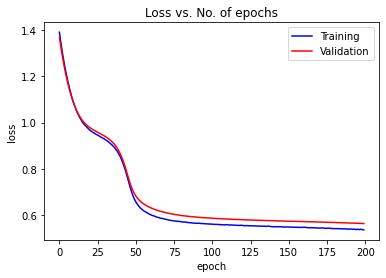

In [ ]:
plot_losses(history)

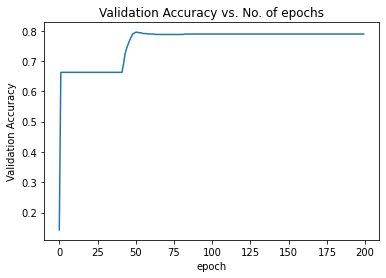

In [ ]:
plot_accuracies(history, 'val_acc', 'Validation Accuracy', 'Validation Accuracy vs. No. of epochs')

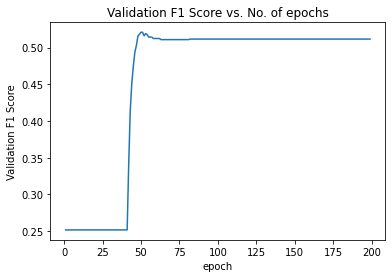

In [ ]:
plot_accuracies(history, 'val_f1', 'Validation F1 Score', 'Validation F1 Score vs. No. of epochs')

In [ ]:
# evaluating the test dataset performance
test_history = [evaluate(model, test_dataloader)]

In [ ]:
test_history

[{'val_acc': 0.7866666913032532,
  'val_f1': 0.5307966470718384,
  'val_loss': 0.5694195628166199,
  'val_precision': 0.5056716203689575,
  'val_recall': 0.5628145933151245}]

**Experiment 02**







In [ ]:
batch_size = 32
seed = 4
num_epochs = 200
omptimser = torch.optim.Adam
lr = 0.001

In [ ]:
transform = transforms.Compose([
                      transforms.Resize((32, 32)), 
                      transforms.RandomRotation(20),
                      transforms.ToTensor(),])

In [ ]:
dataset = ImageFolder(data_dir, transform=transform)
print(dataset)

Dataset ImageFolder
    Number of datapoints: 4482
    Root location: /content/drive/MyDrive/4.2 Rukaiya/assignment2Data/imagery
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )


In [ ]:
torch.manual_seed(seed);
test_size = math.floor(0.2 * len(dataset))
val_size = math.floor(0.15 * len(dataset))
train_size = len(dataset) - val_size - test_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
len(train_dataset), len(val_dataset), len(test_dataset)

(2914, 672, 896)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
validation_dataloader = DataLoader(val_dataset, batch_size)
test_dataloader = DataLoader(test_dataset, batch_size)

In [ ]:
class CovNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(2, 2), #64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.MaxPool2d(2, 2), #128 x 8 x 8
            
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.MaxPool2d(2, 2), #256 x 4 x 4
          
            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 4))
        
    def forward(self, x):
        return self.network(x)
      
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                 
        loss = F.cross_entropy(out, labels) 
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    
        out = out.to(device='cuda')
        loss = F.cross_entropy(out, labels)   
        labels = labels.to(device='cuda')
        acc = accuracy(out, labels)           
        prec = precision(out, labels)
        rec = recall(out, labels)
        f1 = f1_score(out, labels)
        return {'val_loss':loss, 'val_acc': acc, 'val_recall': rec, 'val_precision': prec, 'val_f1': f1}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        batch_recall = [x['val_recall'] for x in outputs]
        epoch_recall = torch.stack(batch_recall).mean()  
        batch_precision = [x['val_precision'] for x in outputs]
        epoch_precision = torch.stack(batch_precision).mean()  
        batch_f1 = [x['val_f1'] for x in outputs]
        epoch_f1 = torch.stack(batch_f1).mean()     
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item(), 'val_recall': epoch_recall.item(), 'val_precision': epoch_precision.item(), 'val_f1': epoch_f1.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:}, val_acc: {:}, val_recall: {:}, val_precision: {:}, val_f1: {:}".format(epoch, result['val_loss'], result['val_acc'], result['val_recall'], result['val_precision'], result['val_f1']))

In [ ]:
model = CovNet()
model

CovNet(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Dropout(p=0.5, inplace=False)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_features=

In [ ]:
device = get_default_device()

In [ ]:
train_dataloader = DeviceDataLoader(train_dataloader, device)
validation_dataloader = DeviceDataLoader(validation_dataloader, device)
test_dataloader = DeviceDataLoader(test_dataloader, device)
to_device(model, device)

CovNet(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Dropout(p=0.5, inplace=False)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_features=

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(CovNet(), device)

In [ ]:
history_CovN = fit(num_epochs, lr, model, train_dataloader, validation_dataloader, omptimser)

Epoch [0], val_loss: 0.5987120866775513, val_acc: 0.8035714626312256, val_recall: 0.5529100894927979, val_precision: 0.49187588691711426, val_f1: 0.5204028487205505
Epoch [1], val_loss: 0.6080060005187988, val_acc: 0.7991071343421936, val_recall: 0.5489418506622314, val_precision: 0.49086058139801025, val_f1: 0.5180191397666931
Epoch [2], val_loss: 0.8133187890052795, val_acc: 0.800595223903656, val_recall: 0.5502645969390869, val_precision: 0.4911719262599945, val_f1: 0.5188199877738953
Epoch [3], val_loss: 0.713884711265564, val_acc: 0.8035714626312256, val_recall: 0.5529100894927979, val_precision: 0.49187588691711426, val_f1: 0.5204028487205505
Epoch [4], val_loss: 0.641878068447113, val_acc: 0.7991071343421936, val_recall: 0.5532633662223816, val_precision: 0.4810405671596527, val_f1: 0.5143024325370789
Epoch [5], val_loss: 0.6010519862174988, val_acc: 0.8020833730697632, val_recall: 0.5515873432159424, val_precision: 0.49150922894477844, val_f1: 0.5196125507354736
Epoch [6], val_

In [ ]:
from matplotlib import pyplot as plt
def plot_accuracies(history, metric, ylabel, title):
    accuracies = [x[metric] for x in history]
    plt.plot(accuracies)
    plt.xlabel('epoch')
    plt.ylabel(ylabel)
    plt.title(title);

In [ ]:
plot_accuracies(history_CovN, 'val_acc', 'Validation Accuracy', 'Validation Accuracy vs. No. of epochs')

In [ ]:
plot_accuracies(history_CovN, 'val_f1', 'Validation F1 Score', 'Validation F1 Score vs. No. of epochs')

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-b')
    plt.plot(val_losses, '-r')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history_CovN)

In [ ]:
test_history_CovN = [evaluate(model, validation_dataloader)]

In [ ]:
test_history_CovN

[{'val_acc': 0.9985119104385376,
  'val_f1': 0.9982202053070068,
  'val_loss': 0.007863505743443966,
  'val_precision': 0.9970238208770752,
  'val_recall': 0.9994823932647705}]